In [1]:
# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
# <br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Иванов Иван Иванович</h5>
# <h5 style="text-align: right;">Группа: С-04-15</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>

<h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
<br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
</br>
<h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

</br>
</br>
</br>
</br>
</br>

<h1 style="text-align: center;">Курсовая работа по курсу:</h1>
<h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: right;">Студент: Иванов Иван Иванович</h5>
<h5 style="text-align: right;">Группа: С-04-15</h5>

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: center;">Москва 2023</h5>

In [2]:
# ## Вариант №1

# ### $\space$ Дано:
# * $P_0 = 120 \space МПа $ - <Что это>
# * $t_0 = 565 ^\circ C$ -  <Что это>
# * $P_{пп} = 4.5 \space МПа$ -  <Что это>
# * $t_{пп} = 565 ^\circ C$ -  <Что это>
# * $P_{к} = 3.5 \space кПа$ -  <Что это>
# * $t_{п.в.} = 275^\circ C$ -  <Что это>

# * $N_{э} = 315 \space МВт$ -  <Что это>
# * z = 9 -  <Что это>

## Вариант №1

### $\space$ Дано:
* $P_0 = 120 \space МПа $ - <Что это>
* $t_0 = 565 ^\circ C$ -  <Что это>
* $P_{пп} = 4.5 \space МПа$ -  <Что это>
* $t_{пп} = 565 ^\circ C$ -  <Что это>
* $P_{к} = 3.5 \space кПа$ -  <Что это>
* $t_{п.в.} = 275^\circ C$ -  <Что это>

* $N_{э} = 315 \space МВт$ -  <Что это>
* z = 9 -  <Что это>

In [3]:
# # 1. Построение процесса расширения пара в турбине.
# Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

# 1. Построение процесса расширения пара в турбине. Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

<h1><span style="color:red">Warning</span><h5>Код ниже должен быть в `.py файле`<h5/>

In [9]:
# Просто вспомогательный код который нужен для отрисовки. Берется откуда-то еще в курсовом проекте

from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269 #Температура питательной воды
electrical_power = 830 * (10 ** 6) #Электричесская мощность
z = 9 #Число отборов шт.
avg_diameter = 0.9 # dр.с. = 0,9 - 1,1
rotation_speed = 50 #n
H_0 = 105
p_feed_water = 1.35 * p_0 #Давление питательной воды

#КПД
internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

#Потери давления
delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


real_p0 = p_0 - delta_p0
real_p1t = p_middle + delta_p_middle
real_p_middle = p_middle - delta_p_1

_point_0 = gas(P = p_0 * unit, T=to_kelvin(t_0))
point_0 = gas(P=real_p0 * unit, h=_point_0.h)
point_1t = gas(P=real_p1t * unit, s=_point_0.s)

hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
h_1 = point_0.h - hp_heat_drop
point_1 = gas(P=real_p1t * unit, h=h_1)

_point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
point_2t = gas(P=p_k * unit, s=_point_middle.s)

lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
h_2 = point_middle.h - lp_heat_drop
point_2 = gas(P=p_k * unit, h=h_2)

In [10]:


def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

    
def plot_process(ax, points, **kwargs):
    ax.plot([point.s for point in points], [point.h for point in points], **kwargs)

    
def get_isobar(point):
    s = point.s
    s_values = np.arange(s*0.9, s*1.1, 0.2 * s / 1000)
    h_values = [gas(P=point.P, s=_s).h for _s in s_values]
    return s_values, h_values


def get_isoterm_steam(point):
    t = point.T
    p = point.P
    s = point.s
    s_max = s * 1.2
    s_min = s * 0.8
    p_values = np.arange(p*0.8, p*1.2, 0.4 * p / 1000)
    h_values = np.array([gas(P=_p, T=t).h for _p in p_values])
    s_values = np.array([gas(P=_p, T=t).s for _p in p_values])
    mask = (s_values >= s_min) & (s_values <= s_max)
    return s_values[mask], h_values[mask]


def get_isoterm_two_phases(point):
    x = point.x
    p = point.P
    x_values = np.arange(x*0.9, min(x*1.1, 1), (1 - x) / 1000)
    h_values = np.array([gas(P=p, x=_x).h for _x in x_values])
    s_values = np.array([gas(P=p, x=_x).s for _x in x_values])
    return s_values, h_values


def get_isoterm(point):
    if point.phase == 'Two phases':
        return get_isoterm_two_phases(point)
    return get_isoterm_steam(point)


def plot_isolines(ax, point):
    s_isobar, h_isobar = get_isobar(point)
    s_isoterm, h_isoterm = get_isoterm(point)
    ax.plot(s_isobar, h_isobar, color='green', label='Изобара')
    ax.plot(s_isoterm, h_isoterm, color='blue', label='Изотерма')

    
def plot_points(ax, points):
    for point in points:
        ax.scatter(point.s, point.h, s=20, color="red")
        plot_isolines(ax, point)


def plot_hs_diagram(ax, points):
    plot_points(ax, points)
    ax.grid()
    ax.set_xlabel(r"S, $\frac{кДж}{кг * K}$", fontsize=14)
    ax.set_ylabel(r"h, $\frac{кДж}{кг}$", fontsize=14)
    ax.set_title("HS-диаграмма процесса расширения", fontsize=18)
    ax.legend()
    legend_without_duplicate_labels(ax)

In [11]:
# Код ниже уже должен быть в ноутбуке

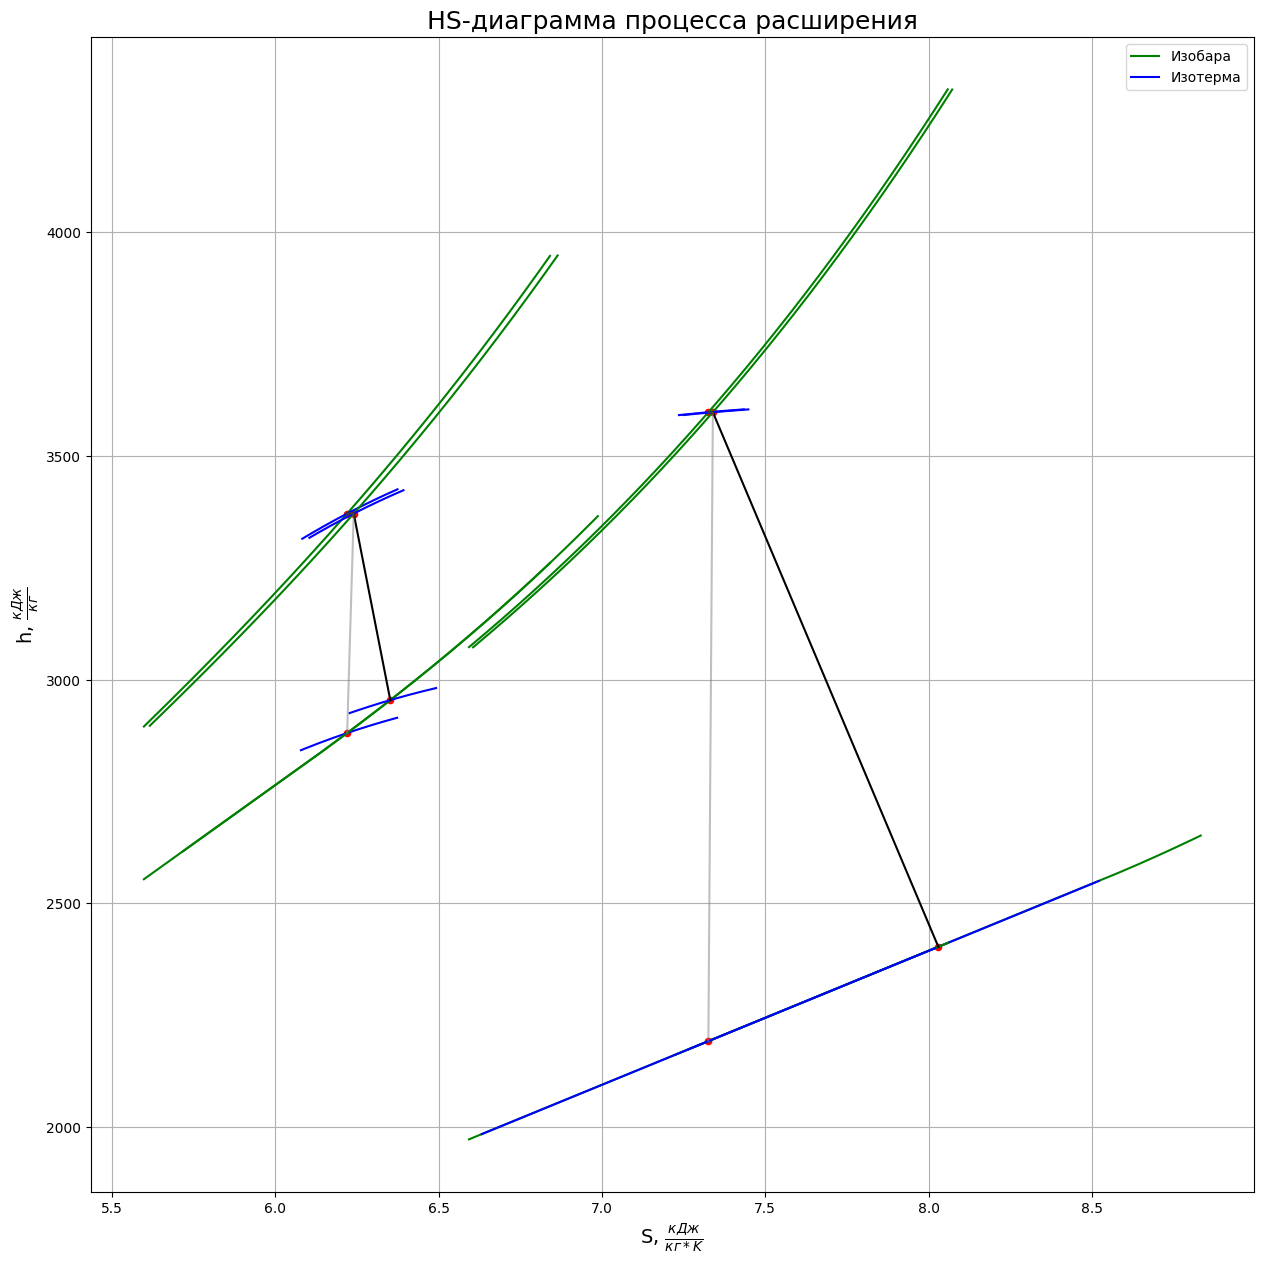

In [12]:
fig, ax  = plt.subplots(1, 1, figsize=(15, 15))
plot_hs_diagram(
    ax,
    points=[_point_0, point_0, point_1t, point_1, _point_middle, point_middle, point_2, point_2t]
)
plot_process(ax, points=[_point_0, point_0, point_1], color='black')
plot_process(ax, points=[_point_middle, point_middle, point_2], color='black')
plot_process(ax, points=[_point_0, point_0, point_1t], alpha=0.5, color='grey')
plot_process(ax, points=[_point_middle, point_middle, point_2t], alpha=0.5, color='grey')

## Далее в таком же стиле весь остальной курсовой проект